In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from catboost import cv, Pool
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.metrics import AUC
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
RS = 121212
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# Загрузка данных

In [2]:
df = pd.read_csv('train_dataset_Самолет.csv', low_memory=False, parse_dates=['report_date'])

In [3]:
df.head()

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164


plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes([int, float]).corr())
plt.show()

In [4]:
data = df.dropna(thresh=int(len(df)*0.95), axis=1).copy()
data.drop(columns=['col1454'], inplace=True)

In [5]:
data = data.fillna(data.mean())

In [6]:
data.head()

,report_date,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
0,2022-11-01,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,37.88,37.88,37.880,0.00,0.00,0.00,545.000000,0.256261
1,2022-11-01,5,0,1,0.0,0.0,0.0,0.0,0.0,6.0,...,1.0,1.0,38.75,3.34,21.045,0.00,0.00,0.00,242.000000,0.256261
2,2022-05-01,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,36.75,36.75,36.750,2.10,2.10,2.10,557.000000,0.256261
3,2022-09-01,7,0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,35.56,35.56,35.560,1.40,1.40,1.40,332.556663,0.258682
4,2022-08-01,8,0,0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,2.0,54.52,54.52,54.520,2.28,2.28,2.28,256.000000,0.254164


In [7]:
data_f = data.copy()

plt.figure(figsize=(15, 10))
sns.heatmap(data.corr())
plt.show()

In [8]:
client_id = data['client_id']

In [9]:
data.drop(columns='client_id', inplace=True)

# Модели

## Создание baseline модели

In [176]:
features = data.drop(columns=['target', 'report_date'])

In [177]:
target = data['target']

In [178]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, stratify=target,
                                                                            random_state=RS)

In [179]:
features_train, target_train = SMOTE().fit_resample(features_train, target_train)

In [180]:
params = {
    'loss_function': 'Logloss',
    'iterations': 300,
    'custom_loss': ['AUC', 'F1'],
    'random_seed': RS,
    'learning_rate': 0.2
}

In [181]:
cv_data = cv(
    params=params,
    pool=Pool(features_train, label=target_train),
    fold_count=5, # Разбивка выборки на 5 кусочков
    shuffle=True, # Перемешаем наши данные
    partition_random_seed=RS,
    plot=True,
    stratified=True, 
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.03023389684
bestIteration = 298

Training on fold [1/5]

bestTest = 0.0312237162
bestIteration = 296

Training on fold [2/5]

bestTest = 0.03398460708
bestIteration = 283

Training on fold [3/5]

bestTest = 0.02906965167
bestIteration = 299

Training on fold [4/5]

bestTest = 0.03429310008
bestIteration = 299



In [182]:
cv_data

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std,test-F1-mean,test-F1-std,train-F1-mean,train-F1-std
0,0,0.536532,0.004389,0.535888,0.003173,0.893450,0.006045,0.812444,0.008454,0.813299,0.006596
1,1,0.465675,0.010687,0.464306,0.011498,0.924054,0.004516,0.832049,0.009628,0.833405,0.007713
2,2,0.416351,0.006557,0.414483,0.008361,0.934361,0.004986,0.844919,0.007686,0.847505,0.005688
3,3,0.380018,0.003952,0.377387,0.006719,0.941819,0.004097,0.857059,0.007921,0.860333,0.009116
4,4,0.353386,0.005507,0.349801,0.006489,0.948600,0.002820,0.869485,0.006312,0.873574,0.006650
...,...,...,...,...,...,...,...,...,...,...,...
295,295,0.031841,0.002246,0.012002,0.001397,0.999115,0.000233,0.991542,0.000776,0.999299,0.000352
296,296,0.031809,0.002255,0.011966,0.001428,0.999109,0.000231,0.991644,0.000840,0.999299,0.000352
297,297,0.031806,0.002258,0.011944,0.001448,0.999110,0.000233,0.991594,0.000888,0.999299,0.000352
298,298,0.031777,0.002283,0.011905,0.001487,0.999109,0.000230,0.991594,0.000888,0.999287,0.000332


In [183]:
baseline_auc_valid = cv_data['test-AUC-mean'].tail(1)

In [184]:
baseline_f1_valid = cv_data['test-F1-mean'].tail(1)

In [185]:
baseline_auc_valid

299    0.999107
Name: test-AUC-mean, dtype: float64

In [186]:
baseline_f1_valid

299    0.991644
Name: test-F1-mean, dtype: float64

### Валидация модели

In [187]:
model = CatBoostClassifier(loss_function='Logloss',
    iterations=300,
    custom_loss=['AUC', 'F1'],
    random_seed= RS,
    learning_rate= 0.2,
    verbose=False)

In [188]:
model.fit(features_train, target_train)

In [189]:
pred = model.predict(features_test)

In [190]:
baseline_auc_test = roc_auc_score(target_test, pred)

In [191]:
baseline_auc_test

0.7714805820837554

In [192]:
baseline_f1_test = f1_score(target_test, pred)

In [193]:
baseline_f1_test

0.6233766233766234

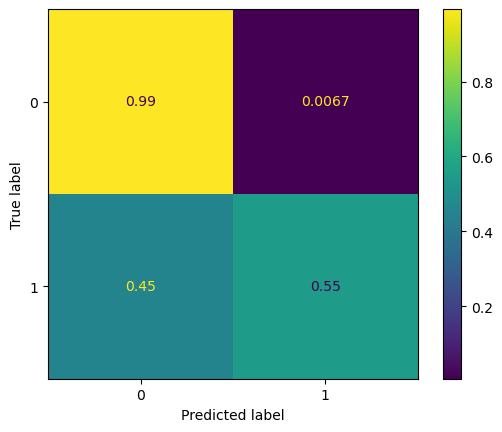

In [194]:
cm = confusion_matrix(target_test, pred, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [197]:

# Get predicted probabilities for each class
preds_proba = model.predict_proba(features_test)
# Get predicted RawFormulaVal


In [204]:
preds_proba

array([[9.96620583e-01, 3.37941666e-03],
       [9.99988513e-01, 1.14866018e-05],
       [9.99340698e-01, 6.59301666e-04],
       ...,
       [9.99810312e-01, 1.89688023e-04],
       [9.99472793e-01, 5.27206954e-04],
       [9.94782749e-01, 5.21725129e-03]])

In [205]:
df = pd.DataFrame(preds_proba)

In [211]:
(df[1] > 0.5).sum()

100

In [202]:
preds = model.predict(features_test)

In [203]:
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [200]:
from math import exp

In [201]:
exp( preds_proba) / (1+ exp( preds_proba))

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
test['score'] = model.predict_proba(test[model_cols])
sample_submission = test.loc[:, ['report_date', 'client_id', 'score']]

## Модель, обученная на клиентах, которые имеют таргет 0 и 1

In [29]:
train, test = train_test_split(data_f.drop(columns='report_date'), test_size=0.3, random_state=RS, stratify=data['target'])

In [30]:
one_id = train.query('target == 1')['client_id']

In [31]:
clients_changed = train.query('client_id in @one_id')

In [32]:
clients_changed.head()

,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
4158,3743,1,0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,...,4.0,4.0,92.55,92.55,92.55,5.30,5.30,5.30,2.0,0.256061
8666,6612,1,0,0.0,1.0,2.0,2.0,2.0,2.0,1.0,...,2.0,2.0,56.99,56.99,56.99,2.06,2.06,2.06,18.0,0.256061
10839,4814,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,63.40,63.40,63.40,2.25,2.25,2.25,548.0,0.259377
3043,3547,0,0,0.0,0.0,2.0,3.0,3.0,3.0,0.0,...,1.0,1.0,35.56,35.56,35.56,1.40,1.40,1.40,58.0,0.260907
9480,2476,0,0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,...,3.0,3.0,77.29,77.29,77.29,2.93,2.93,2.93,122.0,0.258966


In [33]:
features_train = clients_changed.drop(columns=['target', 'client_id'])

In [34]:
target_train = clients_changed['target']

In [35]:
features_train, target_train = SMOTE().fit_resample(features_train, target_train)

In [36]:
params = {
    'loss_function': 'Logloss',
    'iterations': 300,
    'custom_loss': ['AUC', 'F1'],
    'random_seed': RS,
    'learning_rate': 0.2
}

In [37]:
cv_data = cv(
    params=params,
    pool=Pool(features_train, label=target_train),
    fold_count=5, # Разбивка выборки на 5 кусочков
    shuffle=True, # Перемешаем наши данные
    partition_random_seed=RS,
    plot=True,
    stratified=True, 
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.2657955628
bestIteration = 83

Training on fold [1/5]

bestTest = 0.3191221535
bestIteration = 119

Training on fold [2/5]

bestTest = 0.3931816514
bestIteration = 62

Training on fold [3/5]

bestTest = 0.3363049248
bestIteration = 68

Training on fold [4/5]

bestTest = 0.3338696237
bestIteration = 64



In [38]:
cv_data

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std,test-F1-mean,test-F1-std,train-F1-mean,train-F1-std
0,0,0.654992,0.014982,0.635127,0.012250,0.705375,0.054845,0.612675,0.061511,0.692665,0.018658
1,1,0.617996,0.017951,0.582159,0.006783,0.784171,0.045685,0.692234,0.041742,0.771671,0.025309
2,2,0.597432,0.016322,0.555640,0.011928,0.807552,0.044113,0.721323,0.031675,0.792097,0.018839
3,3,0.580450,0.020721,0.519145,0.020679,0.818490,0.053430,0.733213,0.051147,0.822481,0.022631
4,4,0.557614,0.020352,0.489394,0.026294,0.842730,0.047001,0.736730,0.026226,0.842400,0.019927
...,...,...,...,...,...,...,...,...,...,...,...
295,295,0.385689,0.040631,0.012221,0.002028,0.935152,0.011461,0.851887,0.036071,0.996716,0.001123
296,296,0.386377,0.040603,0.012190,0.002036,0.935098,0.011434,0.851887,0.036071,0.996716,0.001123
297,297,0.386715,0.040501,0.012141,0.002060,0.935206,0.011716,0.853240,0.036546,0.996716,0.001123
298,298,0.387260,0.040691,0.012113,0.002067,0.935421,0.011691,0.850444,0.034038,0.996716,0.001123


In [39]:
changed_auc_valid = cv_data['test-AUC-mean'].tail(1)

In [40]:
changed_f1_valid = cv_data['test-F1-mean'].tail(1)

In [41]:
changed_auc_valid

299    0.935259
Name: test-AUC-mean, dtype: float64

In [42]:
changed_f1_valid

299    0.85324
Name: test-F1-mean, dtype: float64

### Валидация модели

In [43]:
model = CatBoostClassifier(loss_function='Logloss',
    iterations=300,
    custom_loss=['AUC', 'F1'],
    random_seed= RS,
    learning_rate= 0.2,
    verbose=False)

In [44]:
model.fit(features_train, target_train)

In [45]:
features_test = test.drop(columns=['target', 'client_id'])

In [46]:
target_test = test['target']

In [47]:
pred = model.predict(features_test)

In [48]:
changed_auc_test = roc_auc_score(target_test, pred)

In [49]:
changed_auc_test

0.5046026577807784

In [50]:
changed_f1_test = f1_score(target_test, pred)

In [51]:
changed_f1_test

0.05902777777777777

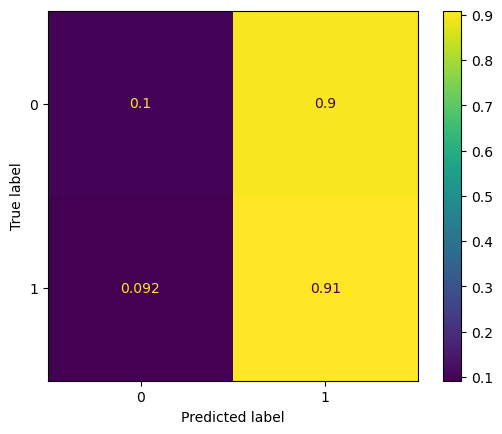

In [52]:
cm = confusion_matrix(target_test, pred, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

Делаем вывод о том, что модель не обучается на таких данных

## Модель, обученная на измененных данных - добавили наблюдения с таргетом 1 для получения трех единиц по уникальному пользователю, совершившему покупку

In [53]:
train, test = train_test_split(data_f.drop(columns='report_date'), test_size=0.3, random_state=RS, stratify=data['target'])

In [54]:
clients = train.query('target == 1').groupby('client_id').agg('count').reset_index()

In [55]:
add_two = clients.query('target == 1')['client_id']

In [56]:
add_two

1       210
2       264
6       354
7       415
11      474
       ... 
157    7262
158    7331
160    7652
162    8041
163    8067
Name: client_id, Length: 63, dtype: int64

In [57]:
add_one = clients.query('target == 2')['client_id']

In [58]:
add_two_values = train.query('client_id in @add_two & target==1').groupby('client_id').agg('mean').reset_index()

In [59]:
add_one_values = train.query('client_id in @add_one & target==1')

In [60]:
data_added = pd.concat([train, add_two_values, add_two_values, add_one_values], axis=0)

In [61]:
data_added

,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
12103,1948,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,...,1.0,1.0,33.65,33.65,33.65,1.13,1.13,1.130,162.000000,0.257549
6774,4756,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,...,2.0,2.0,59.49,59.49,59.49,1.83,1.83,1.830,109.000000,0.258306
12287,3605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,79.58,79.58,79.58,3.98,3.98,3.980,390.000000,0.257348
8531,1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,1.0,1.0,32.02,20.48,26.25,2.02,1.17,1.595,297.000000,0.256261
6719,2574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,1.0,1.0,37.07,37.07,37.07,2.28,2.28,2.280,335.000000,0.256261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12469,7744,1.0,0.0,2.0,4.0,4.0,4.0,4.0,4.0,0.0,...,2.0,2.0,33.10,32.90,33.05,0.00,0.00,0.000,5.000000,0.322993
9820,3849,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,1.0,1.0,37.30,3.20,20.25,0.00,0.00,0.000,307.000000,0.287503
9121,2037,1.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,...,4.0,4.0,92.55,92.55,92.55,5.30,5.30,5.300,61.000000,0.258306
10641,6805,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,35.66,35.66,35.66,0.00,0.00,0.000,332.556663,0.256261


In [62]:
features_train = data_added.drop(columns=['target', 'client_id'])

In [63]:
target_train = data_added['target']

In [64]:
features_train, target_train = SMOTE().fit_resample(features_train, target_train)

In [65]:
params = {
    'loss_function': 'Logloss',
    'iterations': 300,
    'custom_loss': ['AUC', 'F1'],
    'random_seed': RS,
    'learning_rate': 0.2
}

In [66]:
cv_data = cv(
    params=params,
    pool=Pool(features_train, label=target_train),
    fold_count=5, # Разбивка выборки на 5 кусочков
    shuffle=True, # Перемешаем наши данные
    partition_random_seed=RS,
    plot=True,
    stratified=True, 
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.02698364126
bestIteration = 299

Training on fold [1/5]

bestTest = 0.02898584742
bestIteration = 299

Training on fold [2/5]

bestTest = 0.02363276002
bestIteration = 299

Training on fold [3/5]

bestTest = 0.02646903615
bestIteration = 299

Training on fold [4/5]

bestTest = 0.02714587718
bestIteration = 299



In [67]:
cv_data

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std,test-F1-mean,test-F1-std,train-F1-mean,train-F1-std
0,0,0.598816,0.011656,0.597477,0.011387,0.845266,0.010546,0.764888,0.011987,0.769898,0.002566
1,1,0.528167,0.008973,0.526439,0.005693,0.875917,0.008365,0.798894,0.012568,0.802270,0.009493
2,2,0.482357,0.006382,0.479442,0.002847,0.894021,0.005914,0.804752,0.007166,0.808197,0.007923
3,3,0.448205,0.011566,0.445589,0.010064,0.907242,0.005726,0.819093,0.004366,0.823143,0.007921
4,4,0.426441,0.009737,0.422528,0.007255,0.916042,0.003482,0.827082,0.008505,0.831714,0.005468
...,...,...,...,...,...,...,...,...,...,...,...
295,295,0.026939,0.002042,0.011319,0.000298,0.999432,0.000357,0.993972,0.000601,0.999414,0.000152
296,296,0.026840,0.002018,0.011226,0.000279,0.999441,0.000351,0.994022,0.000523,0.999427,0.000127
297,297,0.026753,0.001981,0.011163,0.000296,0.999448,0.000353,0.993972,0.000546,0.999440,0.000138
298,298,0.026680,0.001946,0.011084,0.000318,0.999443,0.000354,0.993972,0.000546,0.999453,0.000132


In [68]:
added_auc_valid = cv_data['test-AUC-mean'].tail(1)

In [69]:
added_f1_valid = cv_data['test-F1-mean'].tail(1)

In [70]:
added_auc_valid

299    0.999447
Name: test-AUC-mean, dtype: float64

In [71]:
added_f1_valid

299    0.994022
Name: test-F1-mean, dtype: float64

### Валидация модели

In [72]:
model = CatBoostClassifier(loss_function='Logloss',
    iterations=300,
    custom_loss=['AUC', 'F1'],
    random_seed= RS,
    learning_rate= 0.2,
    verbose=False)

In [73]:
model.fit(features_train, target_train)

In [74]:
features_test = test.drop(columns=['target', 'client_id'])

In [75]:
target_test = test['target']

In [76]:
pred = model.predict(features_test)

In [77]:
added_auc_test = roc_auc_score(target_test, pred)

In [78]:
added_auc_test

0.8455577818674159

In [79]:
added_f1_test = f1_score(target_test, pred)

In [80]:
added_f1_test

0.6814814814814815

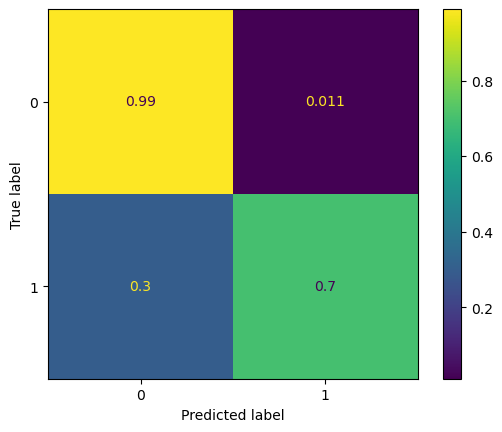

In [81]:
cm = confusion_matrix(target_test, pred, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

## Модель, обученная на измененных данных - заполнили единицами таргет у всех уникальных пользователей, у кого встречается хотя бы одна единица в таргете

In [82]:
train, test = train_test_split(data_f.drop(columns='report_date'), test_size=0.3, random_state=RS, stratify=data_f['target'])

In [83]:
train.query('target == 1')

,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
4158,3743,1,0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,...,4.0,4.0,92.55,92.55,92.550000,5.30,5.30,5.30,2.000000,0.256061
8666,6612,1,0,0.0,1.0,2.0,2.0,2.0,2.0,1.0,...,2.0,2.0,56.99,56.99,56.990000,2.06,2.06,2.06,18.000000,0.256061
10839,4814,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,63.40,63.40,63.400000,2.25,2.25,2.25,548.000000,0.259377
11321,3189,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,71.12,71.12,71.120000,2.88,2.88,2.88,370.000000,0.260262
14224,6360,1,0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,...,3.0,3.0,77.30,77.30,77.300000,4.10,4.10,4.10,95.000000,0.256261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11374,958,1,0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,...,1.0,1.0,29.89,29.89,29.890000,3.96,3.96,3.96,148.000000,0.263759
2376,473,1,0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,...,3.0,3.0,76.43,76.43,76.430000,0.00,0.00,0.00,178.000000,0.256261
10641,6805,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,35.66,35.66,35.660000,0.00,0.00,0.00,332.556663,0.256261
8783,1624,1,0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,...,2.0,2.0,47.85,47.06,47.323333,1.54,1.54,1.54,152.000000,0.252566


In [84]:
one_id = train.query('target == 1')['client_id']

In [85]:
one_id

4158     3743
8666     6612
10839    4814
11321    3189
14224    6360
         ... 
11374     958
2376      473
10641    6805
8783     1624
7137     3537
Name: client_id, Length: 305, dtype: int64

In [86]:
criteria = 'client_id in @one_id'

In [87]:
train.loc[train.eval(criteria), 'target'] = 1

In [88]:
train.query('client_id in @one_id').loc[:, 'target']

4158     1
8666     1
10839    1
3043     1
9480     1
        ..
11374    1
2376     1
10641    1
8783     1
7137     1
Name: target, Length: 410, dtype: int64

In [89]:
features_train = train.drop(columns=['target', 'client_id'])

In [90]:
target_train = train['target']

In [91]:
features_train, target_train = SMOTE().fit_resample(features_train, target_train)

In [92]:
params = {
    'loss_function': 'Logloss',
    'iterations': 300,
    'custom_loss': ['AUC', 'F1'],
    'random_seed': RS,
    'learning_rate': 0.2
}

In [93]:
cv_data = cv(
    params=params,
    pool=Pool(features_train, label=target_train),
    fold_count=5, # Разбивка выборки на 5 кусочков
    shuffle=True, # Перемешаем наши данные
    partition_random_seed=RS,
    plot=True,
    stratified=True, 
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.02403178629
bestIteration = 299

Training on fold [1/5]

bestTest = 0.02384056149
bestIteration = 299

Training on fold [2/5]

bestTest = 0.02378571593
bestIteration = 299

Training on fold [3/5]

bestTest = 0.01900698227
bestIteration = 299

Training on fold [4/5]

bestTest = 0.02238730394
bestIteration = 299



In [94]:
cv_data

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std,test-F1-mean,test-F1-std,train-F1-mean,train-F1-std
0,0,0.563167,0.002398,0.562773,0.000791,0.874538,0.006600,0.794782,0.010091,0.796194,0.001442
1,1,0.492292,0.004725,0.491340,0.000814,0.905406,0.005947,0.823275,0.006288,0.824654,0.001894
2,2,0.446699,0.005139,0.445052,0.000903,0.919245,0.004515,0.842474,0.005862,0.844540,0.000971
3,3,0.412188,0.011845,0.409664,0.007488,0.930631,0.005685,0.855267,0.004658,0.857366,0.004197
4,4,0.383111,0.015677,0.379995,0.012154,0.940217,0.005432,0.857340,0.006313,0.861176,0.002551
...,...,...,...,...,...,...,...,...,...,...,...
295,295,0.022870,0.002206,0.009063,0.000350,0.999653,0.000149,0.994847,0.001168,0.999807,0.000046
296,296,0.022843,0.002183,0.009027,0.000335,0.999654,0.000146,0.994796,0.000901,0.999807,0.000046
297,297,0.022759,0.002197,0.008976,0.000329,0.999656,0.000145,0.994847,0.000874,0.999794,0.000029
298,298,0.022680,0.002147,0.008929,0.000276,0.999660,0.000139,0.994796,0.000901,0.999807,0.000046


In [95]:
filled_auc_valid = cv_data['test-AUC-mean'].tail(1)

In [96]:
filled_f1_valid = cv_data['test-F1-mean'].tail(1)

In [97]:
filled_auc_valid

299    0.999661
Name: test-AUC-mean, dtype: float64

In [98]:
filled_f1_valid

299    0.994744
Name: test-F1-mean, dtype: float64

### Валидация модели

In [99]:
model = CatBoostClassifier(loss_function='Logloss',
    iterations=300,
    custom_loss=['AUC', 'F1'],
    random_seed= RS,
    learning_rate= 0.2,
    verbose=False)

In [100]:
model.fit(features_train, target_train)

In [101]:
features_test = test.drop(columns=['target', 'client_id'])

In [102]:
target_test = test['target']

In [103]:
pred = model.predict(features_test)

In [104]:
filled_auc_test = roc_auc_score(target_test, pred)

In [105]:
filled_auc_test

0.8101367366865945

In [106]:
filled_f1_test = f1_score(target_test, pred)

In [107]:
filled_f1_test

0.6148148148148148

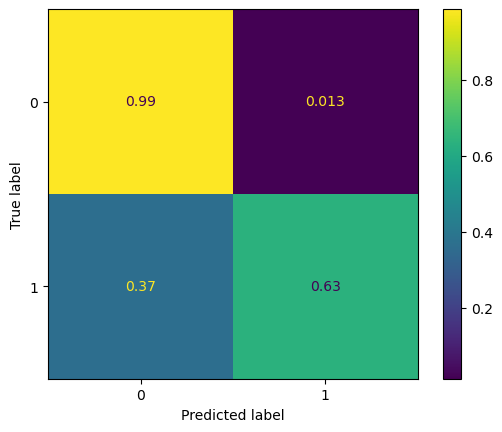

In [108]:
cm = confusion_matrix(target_test, pred, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

## Бейслайн модель, обученная на данных с новыми фичами

In [109]:
train, test = train_test_split(data_f, test_size=0.3, random_state=RS, stratify=data['target'])

In [110]:
def date_maker(row):
    if row['report_date'].year == 2021:
        return row['report_date'].month
    elif row['report_date'].year == 2022:
        return row['report_date'].month + 12
    elif row['report_date'].year == 2023:
        return row['report_date'].month + 24

In [111]:
train['month'] = train.apply(date_maker, axis=1)

In [112]:
test['month'] = test.apply(date_maker, axis=1)

In [113]:
train = train.merge(train.groupby('client_id')['month'].agg('min').reset_index(), \
                    how='left', on='client_id', suffixes=('', '_min'))

In [114]:
test = test.merge(test.groupby('client_id')['month'].agg('min').reset_index(), \
                    how='left', on='client_id', suffixes=('', '_min'))

In [115]:
train['month_from_first'] = train['month'] - train['month_min'] + 1

In [116]:
test['month_from_first'] = test['month'] - test['month_min'] + 1

In [117]:
train = train.drop(columns=['month', 'month_min'])

In [118]:
test = test.drop(columns=['month', 'month_min'])

In [119]:
train.head()

,report_date,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,...,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663,month_from_first
0,2022-07-01,1948,0,0,0.0,0.0,0.0,0.0,2.0,3.0,...,1.0,33.65,33.65,33.65,1.13,1.13,1.130,162.0,0.257549,3
1,2022-11-01,4756,0,1,0.0,0.0,0.0,0.0,3.0,3.0,...,2.0,59.49,59.49,59.49,1.83,1.83,1.830,109.0,0.258306,3
2,2023-01-01,3605,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,79.58,79.58,79.58,3.98,3.98,3.980,390.0,0.257348,12
3,2022-05-01,1680,0,0,0.0,0.0,0.0,0.0,0.0,4.0,...,1.0,32.02,20.48,26.25,2.02,1.17,1.595,297.0,0.256261,4
4,2022-09-01,2574,0,0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,37.07,37.07,37.07,2.28,2.28,2.280,335.0,0.256261,11


In [120]:
features_train = train.drop(columns=['report_date', 'client_id', 'target'])

In [121]:
target_train = train['target']

In [122]:
features_train, target_train = SMOTE().fit_resample(features_train, target_train)

In [123]:
features_test = test.drop(columns=['report_date', 'client_id', 'target'])

In [124]:
target_test = test['target']

In [125]:
params = {
    'loss_function': 'Logloss',
    'iterations': 300,
    'custom_loss': ['AUC', 'F1'],
    'random_seed': RS,
    'learning_rate': 0.2
}

In [126]:
cv_data = cv(
    params=params,
    pool=Pool(features_train, label=target_train),
    fold_count=5, # Разбивка выборки на 5 кусочков
    shuffle=True, # Перемешаем наши данные
    partition_random_seed=RS,
    plot=True,
    stratified=True, 
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.02894187943
bestIteration = 299

Training on fold [1/5]

bestTest = 0.03272671206
bestIteration = 299

Training on fold [2/5]

bestTest = 0.0292563487
bestIteration = 297

Training on fold [3/5]

bestTest = 0.02585513351
bestIteration = 299

Training on fold [4/5]

bestTest = 0.03062889362
bestIteration = 299



In [127]:
cv_data

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std,test-F1-mean,test-F1-std,train-F1-mean,train-F1-std
0,0,0.566780,0.003527,0.566254,0.004242,0.888249,0.003900,0.806034,0.005051,0.807711,0.003586
1,1,0.473087,0.012015,0.471640,0.006932,0.910726,0.006788,0.824855,0.006439,0.827433,0.005544
2,2,0.419958,0.011270,0.417594,0.006726,0.931166,0.009551,0.844666,0.013120,0.846899,0.009161
3,3,0.376470,0.007160,0.373704,0.005602,0.942029,0.005612,0.858942,0.011000,0.862475,0.007843
4,4,0.351365,0.007031,0.348727,0.003120,0.949578,0.004630,0.871009,0.005875,0.874074,0.003707
...,...,...,...,...,...,...,...,...,...,...,...
295,295,0.029709,0.002551,0.011196,0.001680,0.999161,0.000142,0.992405,0.001301,0.999631,0.000130
296,296,0.029625,0.002568,0.011143,0.001674,0.999166,0.000143,0.992506,0.001201,0.999631,0.000130
297,297,0.029590,0.002559,0.011112,0.001662,0.999166,0.000143,0.992557,0.001212,0.999643,0.000132
298,298,0.029573,0.002507,0.011071,0.001642,0.999165,0.000142,0.992557,0.001212,0.999643,0.000132


In [128]:
feature_month_auc_valid = cv_data['test-AUC-mean'].tail(1)

In [129]:
feature_month_f1_valid = cv_data['test-F1-mean'].tail(1)

In [130]:
feature_month_auc_valid

299    0.999171
Name: test-AUC-mean, dtype: float64

In [131]:
feature_month_f1_valid

299    0.992607
Name: test-F1-mean, dtype: float64

### Валидация модели

In [132]:
model = CatBoostClassifier(loss_function='Logloss',
    iterations=300,
    custom_loss=['AUC', 'F1'],
    random_seed= RS,
    learning_rate= 0.2,
    verbose=False)

In [133]:
model.fit(features_train, target_train)

In [134]:
pred = model.predict(features_test)

In [135]:
feature_month_auc_test = roc_auc_score(target_test, pred)

In [136]:
feature_month_auc_test

0.7105307575873071

In [137]:
feature_month_f1_test = f1_score(target_test, pred)

In [138]:
feature_month_f1_test

0.5233644859813084

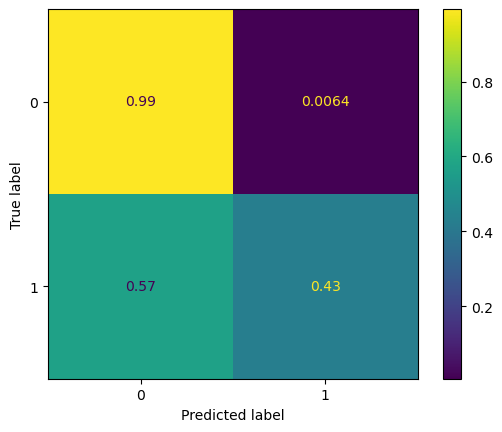

In [139]:
cm = confusion_matrix(target_test, pred, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

## Бейслайн модель с новыми фичами (месяц года)

In [140]:
data_f

,report_date,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
0,2022-11-01,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,37.88,37.88,37.880,0.00,0.00,0.000,545.000000,0.256261
1,2022-11-01,5,0,1,0.0,0.0,0.0,0.0,0.0,6.0,...,1.0,1.0,38.75,3.34,21.045,0.00,0.00,0.000,242.000000,0.256261
2,2022-05-01,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,36.75,36.75,36.750,2.10,2.10,2.100,557.000000,0.256261
3,2022-09-01,7,0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,35.56,35.56,35.560,1.40,1.40,1.400,332.556663,0.258682
4,2022-08-01,8,0,0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,2.0,54.52,54.52,54.520,2.28,2.28,2.280,256.000000,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,56.48,56.48,56.480,1.41,1.41,1.410,332.556663,0.276902
14452,2022-09-01,1969,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,64.40,64.40,64.400,0.00,0.00,0.000,745.000000,0.260516
14453,2022-02-01,7116,1,0,0.0,0.0,6.0,6.0,6.0,6.0,...,2.0,2.5,57.27,55.68,56.475,2.25,0.00,1.125,45.000000,0.260005
14454,2021-08-01,7117,0,0,0.0,0.0,0.0,0.0,2.0,3.0,...,1.0,1.0,34.95,34.95,34.950,0.00,0.00,0.000,179.000000,0.256261


In [141]:
train, test = train_test_split(data_f, test_size=0.3, random_state=RS, stratify=data['target'])

In [142]:
def month_maker(row):
        return row['report_date'].month

In [143]:
train['month'] = train.apply(month_maker, axis=1)

In [144]:
test['month'] = test.apply(month_maker, axis=1)

In [145]:
train.head()

,report_date,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,...,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663,month
12103,2022-07-01,1948,0,0,0.0,0.0,0.0,0.0,2.0,3.0,...,1.0,33.65,33.65,33.65,1.13,1.13,1.130,162.0,0.257549,7
6774,2022-11-01,4756,0,1,0.0,0.0,0.0,0.0,3.0,3.0,...,2.0,59.49,59.49,59.49,1.83,1.83,1.830,109.0,0.258306,11
12287,2023-01-01,3605,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,79.58,79.58,79.58,3.98,3.98,3.980,390.0,0.257348,1
8531,2022-05-01,1680,0,0,0.0,0.0,0.0,0.0,0.0,4.0,...,1.0,32.02,20.48,26.25,2.02,1.17,1.595,297.0,0.256261,5
6719,2022-09-01,2574,0,0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,37.07,37.07,37.07,2.28,2.28,2.280,335.0,0.256261,9


In [146]:
train = pd.get_dummies(train, columns=['month'], drop_first=False, dtype='int')

In [147]:
train.head()

,report_date,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
12103,2022-07-01,1948,0,0,0.0,0.0,0.0,0.0,2.0,3.0,...,0,0,0,0,1,0,0,0,0,0
6774,2022-11-01,4756,0,1,0.0,0.0,0.0,0.0,3.0,3.0,...,0,0,0,0,0,0,0,0,1,0
12287,2023-01-01,3605,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8531,2022-05-01,1680,0,0,0.0,0.0,0.0,0.0,0.0,4.0,...,0,0,1,0,0,0,0,0,0,0
6719,2022-09-01,2574,0,0,0.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,0,0,0,1,0,0,0


In [148]:
test = pd.get_dummies(test, columns=['month'], drop_first=False, dtype='int')

In [149]:
features_train = train.drop(columns=['report_date', 'client_id', 'target'])

In [150]:
target_train = train['target']

In [151]:
features_train, target_train = SMOTE().fit_resample(features_train, target_train)

In [152]:
features_test = test.drop(columns=['report_date', 'client_id', 'target'])

In [153]:
target_test = test['target']

In [154]:
params = {
    'loss_function': 'Logloss',
    'iterations': 300,
    'custom_loss': ['AUC', 'F1'],
    'random_seed': RS,
    'learning_rate': 0.2
}

In [155]:
cv_data = cv(
    params=params,
    pool=Pool(features_train, label=target_train),
    fold_count=5, # Разбивка выборки на 5 кусочков
    shuffle=True, # Перемешаем наши данные
    partition_random_seed=RS,
    plot=True,
    stratified=True, 
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.03888838747
bestIteration = 287

Training on fold [1/5]

bestTest = 0.03696499578
bestIteration = 299

Training on fold [2/5]

bestTest = 0.04559449644
bestIteration = 279

Training on fold [3/5]

bestTest = 0.03902370325
bestIteration = 272

Training on fold [4/5]

bestTest = 0.04467178423
bestIteration = 282



In [156]:
cv_data

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std,test-F1-mean,test-F1-std,train-F1-mean,train-F1-std
0,0,0.552559,0.002681,0.551082,0.003962,0.885997,0.007016,0.804101,0.011213,0.810210,0.007599
1,1,0.478017,0.011408,0.475871,0.008077,0.903649,0.005951,0.820972,0.008487,0.824713,0.004565
2,2,0.423597,0.005547,0.420996,0.003568,0.927125,0.005182,0.838726,0.012044,0.840775,0.009173
3,3,0.388720,0.004259,0.386095,0.003456,0.939484,0.003876,0.853901,0.009694,0.855557,0.005171
4,4,0.359068,0.005294,0.355813,0.005731,0.954434,0.003685,0.873041,0.007542,0.876670,0.008397
...,...,...,...,...,...,...,...,...,...,...,...
295,295,0.041263,0.003810,0.010201,0.000578,0.998275,0.000260,0.986164,0.001566,0.999490,0.000119
296,296,0.041233,0.003829,0.010167,0.000577,0.998279,0.000259,0.986164,0.001566,0.999490,0.000119
297,297,0.041251,0.003873,0.010110,0.000573,0.998279,0.000257,0.986164,0.001566,0.999516,0.000097
298,298,0.041180,0.003888,0.010061,0.000566,0.998287,0.000256,0.986164,0.001566,0.999529,0.000107


In [157]:
feature_season_auc_valid = cv_data['test-AUC-mean'].tail(1)

In [158]:
feature_season_f1_valid = cv_data['test-F1-mean'].tail(1)

In [159]:
feature_season_auc_valid

299    0.998285
Name: test-AUC-mean, dtype: float64

In [160]:
feature_season_f1_valid

299    0.986113
Name: test-F1-mean, dtype: float64

### Валидация модели

In [161]:
model = CatBoostClassifier(loss_function='Logloss',
    iterations=300,
    custom_loss=['AUC', 'F1'],
    random_seed= RS,
    learning_rate= 0.2,
    verbose=False)

In [162]:
model.fit(features_train, target_train)

In [163]:
pred = model.predict(features_test)

In [164]:
feature_season_auc_test = roc_auc_score(target_test, pred)

In [165]:
feature_season_auc_test

0.5405581993008897

In [166]:
feature_season_f1_test = f1_score(target_test, pred)

In [167]:
feature_season_f1_test

0.14285714285714285

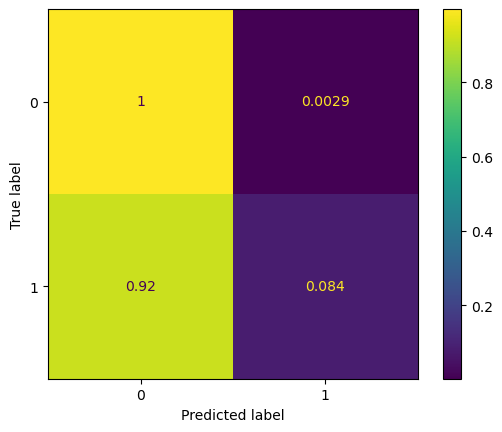

In [168]:
cm = confusion_matrix(target_test, pred, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

## Модель на основе нейронной сети

In [169]:
features = data.drop(columns=['target', 'report_date'])

In [170]:
target = data['target']

In [171]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, stratify=target,
                                                                            random_state=RS)

In [172]:
features_train, target_train = SMOTE().fit_resample(features_train, target_train)

In [173]:
def baseline_nn(features_train):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units=features_train.shape[1], input_dim=features_train.shape[1], 
                                 activation='sigmoid'))
    model.add(keras.layers.Dense(units=1, input_dim=features_train.shape[1], 
                                 activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc', AUC()])
    
    return model

In [174]:
model = baseline_nn(features_train)

In [175]:
model.fit(features_train, target_train, epochs=10, verbose=2,
          validation_data=(features_test, target_test))

Epoch 1/10
614/614 - 2s - loss: 0.7044 - acc: 0.5163 - auc: 0.5138 - val_loss: 0.6927 - val_acc: 0.6020 - val_auc: 0.5661 - 2s/epoch - 3ms/step
Epoch 2/10
614/614 - 1s - loss: 0.6902 - acc: 0.5265 - auc: 0.5379 - val_loss: 0.6986 - val_acc: 0.6267 - val_auc: 0.5947 - 1s/epoch - 2ms/step
Epoch 3/10
614/614 - 1s - loss: 0.6837 - acc: 0.5512 - auc: 0.5733 - val_loss: 0.6998 - val_acc: 0.3576 - val_auc: 0.6280 - 908ms/epoch - 1ms/step
Epoch 4/10
614/614 - 1s - loss: 0.6803 - acc: 0.5558 - auc: 0.5898 - val_loss: 0.6853 - val_acc: 0.3604 - val_auc: 0.6196 - 967ms/epoch - 2ms/step
Epoch 5/10
614/614 - 1s - loss: 0.6779 - acc: 0.5601 - auc: 0.5917 - val_loss: 0.6925 - val_acc: 0.3590 - val_auc: 0.6065 - 967ms/epoch - 2ms/step
Epoch 6/10
614/614 - 1s - loss: 0.6759 - acc: 0.5610 - auc: 0.5966 - val_loss: 0.6501 - val_acc: 0.5912 - val_auc: 0.6039 - 825ms/epoch - 1ms/step
Epoch 7/10
614/614 - 1s - loss: 0.6742 - acc: 0.5620 - auc: 0.5995 - val_loss: 0.6471 - val_acc: 0.6011 - val_auc: 0.6026 - 